### Funções

In [ ]:
def ks(data=None,target=None, prob=None):
    data['target0'] = 1 - data[target]
    data['bucket'] = pd.qcut(data[prob], 10)
    grouped = data.groupby('bucket', as_index = False)
    kstable = pd.DataFrame()
    kstable['min_prob'] = grouped.min()[prob]
    kstable['max_prob'] = grouped.max()[prob]
    kstable['events']   = grouped.sum()[target]
    kstable['nonevents'] = grouped.sum()['target0']
    kstable = kstable.sort_values(by="min_prob", ascending=False).reset_index(drop = True)
    kstable['event_rate'] = (kstable.events / data[target].sum()).apply('{0:.2%}'.format)
    kstable['nonevent_rate'] = (kstable.nonevents / data['target0'].sum()).apply('{0:.2%}'.format)
    kstable['cum_eventrate']=(kstable.events / data[target].sum()).cumsum()
    kstable['cum_noneventrate']=(kstable.nonevents / data['target0'].sum()).cumsum()
    kstable['KS'] = np.round(kstable['cum_eventrate']-kstable['cum_noneventrate'], 3) #* 100

    #Formating
    kstable['cum_eventrate']= kstable['cum_eventrate']#.apply('{0:.2%}'.format)
    kstable['cum_noneventrate']= kstable['cum_noneventrate']#.apply('{0:.2%}'.format)
    kstable.index = range(1,11)
    kstable.index.rename('Decile', inplace=True)
    #pd.set_option('display.max_columns', 9)
    #print(kstable)
    
    #Display KS
    from colorama import Fore
    print(Fore.RED + "KS is " + str(max(kstable['KS']))+"%"+ " at decile " + str((kstable.index[kstable['KS']==max(kstable['KS'])][0])))
    return(kstable)

In [ ]:
def adjust_colum(df,cols_to_move,new_index):
        """
        This method re-arranges the columns in a dataframe to place the desired columns at the desired index.
        ex Usage: df = move_columns(df, ['Rev'], 2)   
        :param df:
        :param cols_to_move: The names of the columns to move. They must be a list
        :param new_index: The 0-based location to place the columns.
        :return: Return a dataframe with the columns re-arranged
        """    
        other = [c for c in df if c not in cols_to_move]
        start = other[0:new_index]
        end = other[new_index:]
        return df[start + cols_to_move + end].copy()

In [ ]:
#import missingno as msno
#import pandas_profiling

from utils import *

import numpy as np
import pylab as plt
import seaborn as sns
import glob
import pandas as pd
pd.set_option('display.max_columns', 500)
import gc
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# The input directory
input_dir = '../raw_data_enade/input/'

data_list = np.sort(np.array(glob.glob(input_dir+'*.csv')))#
#data_list

In [ ]:
data = pd.read_csv(data_list[0],sep=',')

In [ ]:
data.head()

,ANO_PROVA,ANO_ENTRADA,SEXO,IDADE,ESTADO_CIVIL,RACA,ESCOLARIDADE_PAI,ESCOLARIDADE_MAE,RENDA_FAMILIAR,AUXILIO_ESTUDANTIL,BOLSA_ESTUDANTIL,INTERCAMBIO,TRABALHO_DURANTE_GRAD,COTAS,ENSINO_MEDIO,PRINCIPAL_MOTIVACAO,DURACAO_PERMANENCIA,PERMANENCIA_PROLONGADA
0,2014,2009.0,M,18.0,A,A,5,4,4,A,E,B,D,A,B,E,5.0,0
1,2014,2009.0,M,19.0,A,D,3,4,3,D,E,A,A,E,A,H,5.0,0
2,2014,2009.0,M,18.0,A,A,4,4,5,A,A,A,B,A,B,A,5.0,0
3,2014,2009.0,M,18.0,A,A,5,3,3,A,E,B,D,A,B,E,5.0,0
4,2014,2009.0,M,18.0,A,A,4,4,6,A,A,A,D,A,B,A,5.0,0


In [ ]:
# 
print('Não alvo', round(data['PERMANENCIA_PROLONGADA'].value_counts()[0]/len(data) * 100,2), '% of the dataset')
print('Alvo', round(data['PERMANENCIA_PROLONGADA'].value_counts()[1]/len(data) * 100,2), '% of the dataset')

Não alvo 63.07 % of the dataset
Alvo 36.93 % of the dataset


Text(0.5, 1.0, 'Class Distributions \n (0: Não alvo || 1: Alvo)')

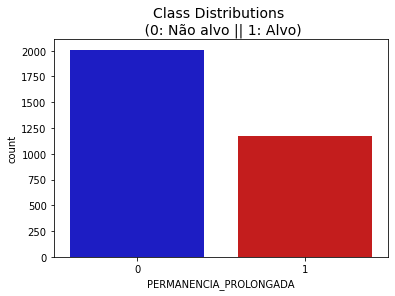

In [ ]:
colors = ["#0101DF", "#DF0101"]

sns.countplot('PERMANENCIA_PROLONGADA', data=data, palette=colors)
plt.title('Class Distributions \n (0: Não alvo || 1: Alvo)', fontsize=14)

<AxesSubplot:xlabel='SEXO', ylabel='PERMANENCIA_PROLONGADA'>

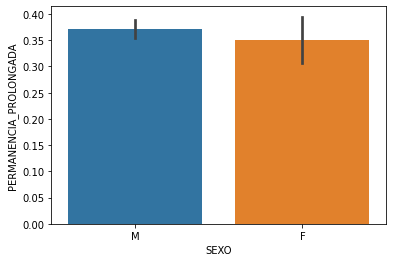

In [ ]:
#
sns.barplot(x="SEXO", y="PERMANENCIA_PROLONGADA", data=data)

In [ ]:
#print percentages of females vs. males that survive
print("Porcetagem sexo feminino PERMANENCIA_PROLONGADA:", data["PERMANENCIA_PROLONGADA"][data["SEXO"] == 'F'].value_counts(normalize = True)[1]*100)

print("Porcetagem sexo masculino PERMANENCIA_PROLONGADA:", data["PERMANENCIA_PROLONGADA"][data["SEXO"] == 'M'].value_counts(normalize = True)[1]*100)

Porcetagem sexo feminino PERMANENCIA_PROLONGADA: 35.10392609699769
Porcetagem sexo masculino PERMANENCIA_PROLONGADA: 37.222828062522716


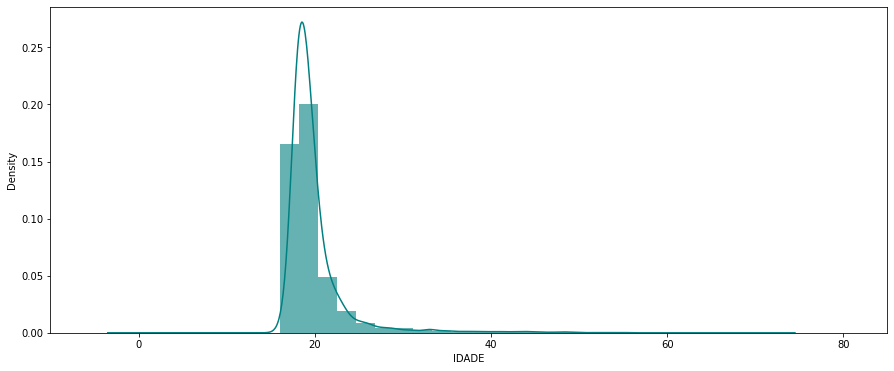

In [ ]:
plt.figure(figsize=(15,6))
ax = data["IDADE"].hist(bins=18, density=True, stacked=True, color='teal', alpha=0.6)
data["IDADE"].plot(kind='density', color='teal')
ax.set(xlabel='IDADE')
plt.xlim(-10,85)
plt.show()



In [ ]:
# mean idade
print('A média da "IDADE" é %.2f' %(data["IDADE"].mean(skipna=True)))
# mediana idade
print('A mediana da "IDADE" é %.2f' %(data["IDADE"].median(skipna=True)))

A média da "IDADE" é 19.94
A mediana da "IDADE" é 19.00


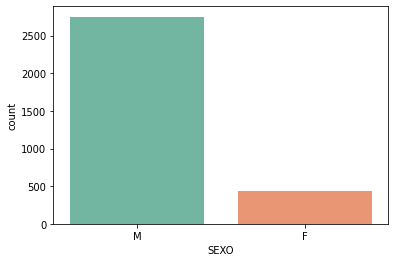

In [ ]:
# SEXO 
sns.countplot(x='SEXO', data=data, palette='Set2')
plt.show()

In [ ]:
#create categorical 
data=pd.get_dummies(data, columns=["SEXO"])
data.drop('SEXO_F', axis=1, inplace=True)

In [ ]:
data.head()

,ANO_PROVA,ANO_ENTRADA,IDADE,ESTADO_CIVIL,RACA,ESCOLARIDADE_PAI,ESCOLARIDADE_MAE,RENDA_FAMILIAR,AUXILIO_ESTUDANTIL,BOLSA_ESTUDANTIL,INTERCAMBIO,TRABALHO_DURANTE_GRAD,COTAS,ENSINO_MEDIO,PRINCIPAL_MOTIVACAO,DURACAO_PERMANENCIA,PERMANENCIA_PROLONGADA,SEXO_M
0,2014,2009.0,18.0,A,A,5,4,4,A,E,B,D,A,B,E,5.0,0,1
1,2014,2009.0,19.0,A,D,3,4,3,D,E,A,A,E,A,H,5.0,0,1
2,2014,2009.0,18.0,A,A,4,4,5,A,A,A,B,A,B,A,5.0,0,1
3,2014,2009.0,18.0,A,A,5,3,3,A,E,B,D,A,B,E,5.0,0,1
4,2014,2009.0,18.0,A,A,4,4,6,A,A,A,D,A,B,A,5.0,0,1


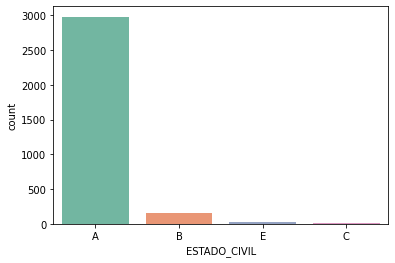

In [ ]:
# View estado civil
sns.countplot(x='ESTADO_CIVIL', data=data, palette='Set2')
plt.show()

In [ ]:
dict_estado_civil = {'A':'SOlTEIRO',
                     'B':'CASADO',
                     'C':'SEPARADO',
                     'D':'VIUVO',
                     'E':'OUTRO'}

In [ ]:
data['ESTADO_CIVIL'] = data.ESTADO_CIVIL.map(dict_estado_civil)
#create categorical 
data=pd.get_dummies(data, columns=["ESTADO_CIVIL"])
data.drop('ESTADO_CIVIL_CASADO', axis=1, inplace=True)
data.drop('ESTADO_CIVIL_SEPARADO', axis=1, inplace=True)
#data.drop('ESTADO_CIVIL_VIUVO', axis=1, inplace=True)
data.drop('ESTADO_CIVIL_OUTRO', axis=1, inplace=True)

In [ ]:
data.head(3)

,ANO_PROVA,ANO_ENTRADA,IDADE,RACA,ESCOLARIDADE_PAI,ESCOLARIDADE_MAE,RENDA_FAMILIAR,AUXILIO_ESTUDANTIL,BOLSA_ESTUDANTIL,INTERCAMBIO,TRABALHO_DURANTE_GRAD,COTAS,ENSINO_MEDIO,PRINCIPAL_MOTIVACAO,DURACAO_PERMANENCIA,PERMANENCIA_PROLONGADA,SEXO_M,ESTADO_CIVIL_SOlTEIRO
0,2014,2009.0,18.0,A,5,4,4,A,E,B,D,A,B,E,5.0,0,1,1
1,2014,2009.0,19.0,D,3,4,3,D,E,A,A,E,A,H,5.0,0,1,1
2,2014,2009.0,18.0,A,4,4,5,A,A,A,B,A,B,A,5.0,0,1,1


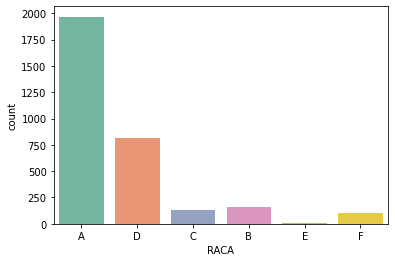

In [ ]:
sns.countplot(x='RACA', data=data, palette='Set2')
plt.show()

In [ ]:
dict_raca = {'A':'BRANCO',
                     'B':'NEGRO',
                     'C':'PARDO',
                     'D':'AMARELO',
                     'E':'INDIGENA',
                     'F':'N_D'}

In [ ]:
data['RACA'] = data.RACA.map(dict_raca)
#create categorical 
data=pd.get_dummies(data, columns=["RACA"])

In [ ]:
data.head(3)

,ANO_PROVA,ANO_ENTRADA,IDADE,ESCOLARIDADE_PAI,ESCOLARIDADE_MAE,RENDA_FAMILIAR,AUXILIO_ESTUDANTIL,BOLSA_ESTUDANTIL,INTERCAMBIO,TRABALHO_DURANTE_GRAD,COTAS,ENSINO_MEDIO,PRINCIPAL_MOTIVACAO,DURACAO_PERMANENCIA,PERMANENCIA_PROLONGADA,SEXO_M,ESTADO_CIVIL_SOlTEIRO,RACA_AMARELO,RACA_BRANCO,RACA_INDIGENA,RACA_NEGRO,RACA_N_D,RACA_PARDO
0,2014,2009.0,18.0,5,4,4,A,E,B,D,A,B,E,5.0,0,1,1,0,1,0,0,0,0
1,2014,2009.0,19.0,3,4,3,D,E,A,A,E,A,H,5.0,0,1,1,1,0,0,0,0,0
2,2014,2009.0,18.0,4,4,5,A,A,A,B,A,B,A,5.0,0,1,1,0,1,0,0,0,0


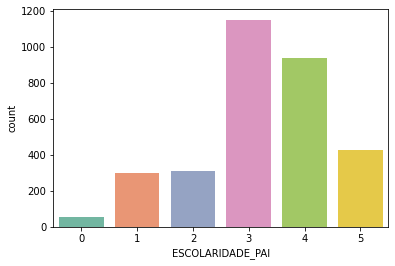

In [ ]:
sns.countplot(x='ESCOLARIDADE_PAI', data=data, palette='Set2')
plt.show()

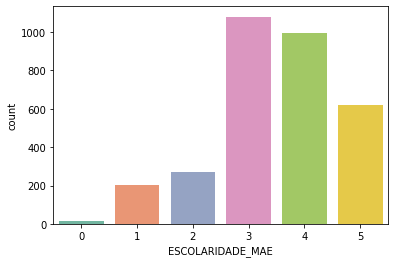

In [ ]:
sns.countplot(x='ESCOLARIDADE_MAE', data=data, palette='Set2')
plt.show()

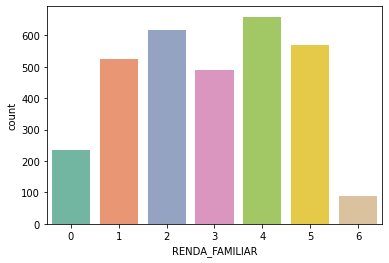

In [ ]:
sns.countplot(x='RENDA_FAMILIAR', data=data, palette='Set2')
plt.show()

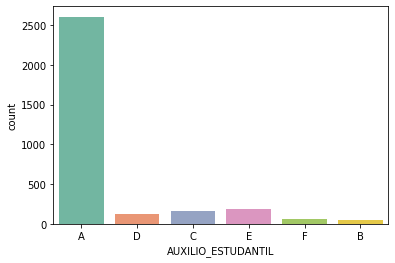

In [ ]:
sns.countplot(x='AUXILIO_ESTUDANTIL', data=data, palette='Set2')
plt.show()

In [ ]:
dict_auxilio_estudantil = {'A':'SEM_AUXILIO',
                     'B':'ALGUM',
                     'C':'ALGUM',
                     'D':'ALGUM',
                     'E':'ALGUM',
                     'F':'ALGUM'}

In [ ]:
data['AUXILIO_ESTUDANTIL'] = data.AUXILIO_ESTUDANTIL.map(dict_auxilio_estudantil)
#create categorical 
data=pd.get_dummies(data, columns=["AUXILIO_ESTUDANTIL"])
data.drop('AUXILIO_ESTUDANTIL_ALGUM', axis=1, inplace=True)

In [ ]:
data.head()

,ANO_PROVA,ANO_ENTRADA,IDADE,ESCOLARIDADE_PAI,ESCOLARIDADE_MAE,RENDA_FAMILIAR,BOLSA_ESTUDANTIL,INTERCAMBIO,TRABALHO_DURANTE_GRAD,COTAS,ENSINO_MEDIO,PRINCIPAL_MOTIVACAO,DURACAO_PERMANENCIA,PERMANENCIA_PROLONGADA,SEXO_M,ESTADO_CIVIL_SOlTEIRO,RACA_AMARELO,RACA_BRANCO,RACA_INDIGENA,RACA_NEGRO,RACA_N_D,RACA_PARDO,AUXILIO_ESTUDANTIL_SEM_AUXILIO
0,2014,2009.0,18.0,5,4,4,E,B,D,A,B,E,5.0,0,1,1,0,1,0,0,0,0,1
1,2014,2009.0,19.0,3,4,3,E,A,A,E,A,H,5.0,0,1,1,1,0,0,0,0,0,0
2,2014,2009.0,18.0,4,4,5,A,A,B,A,B,A,5.0,0,1,1,0,1,0,0,0,0,1
3,2014,2009.0,18.0,5,3,3,E,B,D,A,B,E,5.0,0,1,1,0,1,0,0,0,0,1
4,2014,2009.0,18.0,4,4,6,A,A,D,A,B,A,5.0,0,1,1,0,1,0,0,0,0,1


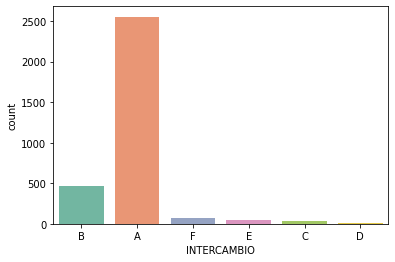

In [ ]:
sns.countplot(x='INTERCAMBIO', data=data, palette='Set2')
plt.show()

In [ ]:
dict_intercambio = {'A':'SEM_INTERCAMBIO',
                     'B':'ALGUM',
                     'C':'ALGUM',
                     'D':'ALGUM',
                     'E':'ALGUM',
                     'F':'ALGUM'}

In [ ]:
data['INTERCAMBIO'] = data.INTERCAMBIO.map(dict_intercambio)
#create categorical 
data=pd.get_dummies(data, columns=["INTERCAMBIO"])
data.drop('INTERCAMBIO_ALGUM', axis=1, inplace=True)

In [ ]:
data.head(3)

,ANO_PROVA,ANO_ENTRADA,IDADE,ESCOLARIDADE_PAI,ESCOLARIDADE_MAE,RENDA_FAMILIAR,BOLSA_ESTUDANTIL,TRABALHO_DURANTE_GRAD,COTAS,ENSINO_MEDIO,PRINCIPAL_MOTIVACAO,DURACAO_PERMANENCIA,PERMANENCIA_PROLONGADA,SEXO_M,ESTADO_CIVIL_SOlTEIRO,RACA_AMARELO,RACA_BRANCO,RACA_INDIGENA,RACA_NEGRO,RACA_N_D,RACA_PARDO,AUXILIO_ESTUDANTIL_SEM_AUXILIO,INTERCAMBIO_SEM_INTERCAMBIO
0,2014,2009.0,18.0,5,4,4,E,D,A,B,E,5.0,0,1,1,0,1,0,0,0,0,1,0
1,2014,2009.0,19.0,3,4,3,E,A,E,A,H,5.0,0,1,1,1,0,0,0,0,0,0,1
2,2014,2009.0,18.0,4,4,5,A,B,A,B,A,5.0,0,1,1,0,1,0,0,0,0,1,1


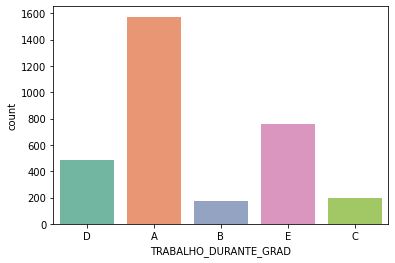

In [ ]:
sns.countplot(x='TRABALHO_DURANTE_GRAD', data=data, palette='Set2')
plt.show()

In [ ]:
dict_trabalho_durante_grad = {'A':'ZERO_HORAS',
                     'B':'ATE_20_HORAS',
                     'C':'ATE_20_HORAS',
                     'D':'ENTRE_21_39_HORAS',
                     'E':'ACIMA_39_HORAS'
                     }

In [ ]:
data['TRABALHO_DURANTE_GRAD'] = data.TRABALHO_DURANTE_GRAD.map(dict_trabalho_durante_grad)
#create categorical 
data=pd.get_dummies(data, columns=["TRABALHO_DURANTE_GRAD"])


In [ ]:
data.head(3)

,ANO_PROVA,ANO_ENTRADA,IDADE,ESCOLARIDADE_PAI,ESCOLARIDADE_MAE,RENDA_FAMILIAR,BOLSA_ESTUDANTIL,COTAS,ENSINO_MEDIO,PRINCIPAL_MOTIVACAO,DURACAO_PERMANENCIA,PERMANENCIA_PROLONGADA,SEXO_M,ESTADO_CIVIL_SOlTEIRO,RACA_AMARELO,RACA_BRANCO,RACA_INDIGENA,RACA_NEGRO,RACA_N_D,RACA_PARDO,AUXILIO_ESTUDANTIL_SEM_AUXILIO,INTERCAMBIO_SEM_INTERCAMBIO,TRABALHO_DURANTE_GRAD_ACIMA_39_HORAS,TRABALHO_DURANTE_GRAD_ATE_20_HORAS,TRABALHO_DURANTE_GRAD_ENTRE_21_39_HORAS,TRABALHO_DURANTE_GRAD_ZERO_HORAS
0,2014,2009.0,18.0,5,4,4,E,A,B,E,5.0,0,1,1,0,1,0,0,0,0,1,0,0,0,1,0
1,2014,2009.0,19.0,3,4,3,E,E,A,H,5.0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,1
2,2014,2009.0,18.0,4,4,5,A,A,B,A,5.0,0,1,1,0,1,0,0,0,0,1,1,0,1,0,0


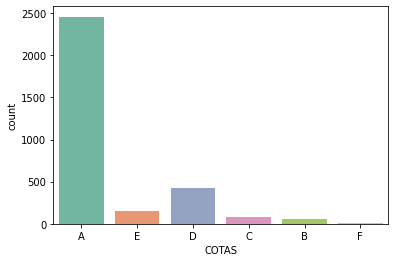

In [ ]:
sns.countplot(x='COTAS', data=data, palette='Set2')
plt.show()

In [ ]:
dict_cotas = {'A':'NAO_COTISTA',
                     'B':'COTISTA',
                     'C':'COTISTA',
                     'D':'COTISTA',
                     'E':'COTISTA',
                     'F':'COTISTA'
                     }

In [ ]:
data['COTAS'] = data.COTAS.map(dict_cotas)
#create categorical 
data=pd.get_dummies(data, columns=["COTAS"])
data.drop('COTAS_COTISTA', axis=1, inplace=True)

In [ ]:
data.head(3)

,ANO_PROVA,ANO_ENTRADA,IDADE,ESCOLARIDADE_PAI,ESCOLARIDADE_MAE,RENDA_FAMILIAR,BOLSA_ESTUDANTIL,ENSINO_MEDIO,PRINCIPAL_MOTIVACAO,DURACAO_PERMANENCIA,PERMANENCIA_PROLONGADA,SEXO_M,ESTADO_CIVIL_SOlTEIRO,RACA_AMARELO,RACA_BRANCO,RACA_INDIGENA,RACA_NEGRO,RACA_N_D,RACA_PARDO,AUXILIO_ESTUDANTIL_SEM_AUXILIO,INTERCAMBIO_SEM_INTERCAMBIO,TRABALHO_DURANTE_GRAD_ACIMA_39_HORAS,TRABALHO_DURANTE_GRAD_ATE_20_HORAS,TRABALHO_DURANTE_GRAD_ENTRE_21_39_HORAS,TRABALHO_DURANTE_GRAD_ZERO_HORAS,COTAS_NAO_COTISTA
0,2014,2009.0,18.0,5,4,4,E,B,E,5.0,0,1,1,0,1,0,0,0,0,1,0,0,0,1,0,1
1,2014,2009.0,19.0,3,4,3,E,A,H,5.0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,1,0
2,2014,2009.0,18.0,4,4,5,A,B,A,5.0,0,1,1,0,1,0,0,0,0,1,1,0,1,0,0,1


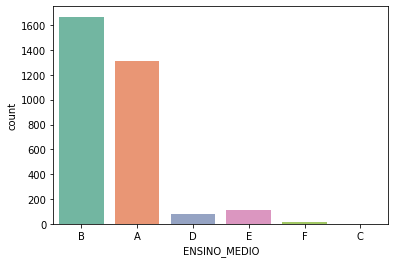

In [ ]:
sns.countplot(x='ENSINO_MEDIO', data=data, palette='Set2')
plt.show()

In [ ]:
dict_ensino_medio = {'A':'PUBLICO',
                     'B':'PRIVADA',
                     'C':'PRIVADA',
                     'D':'PUBLICO',
                     'E':'PRIVADA',
                     'F':'PRIVADA'
                     }

In [ ]:
data['ENSINO_MEDIO'] = data.ENSINO_MEDIO.map(dict_ensino_medio)
#create categorical 
data=pd.get_dummies(data, columns=["ENSINO_MEDIO"])
data.drop('ENSINO_MEDIO_PRIVADA', axis=1, inplace=True)

In [ ]:
data.head(3)

,ANO_PROVA,ANO_ENTRADA,IDADE,ESCOLARIDADE_PAI,ESCOLARIDADE_MAE,RENDA_FAMILIAR,BOLSA_ESTUDANTIL,PRINCIPAL_MOTIVACAO,DURACAO_PERMANENCIA,PERMANENCIA_PROLONGADA,SEXO_M,ESTADO_CIVIL_SOlTEIRO,RACA_AMARELO,RACA_BRANCO,RACA_INDIGENA,RACA_NEGRO,RACA_N_D,RACA_PARDO,AUXILIO_ESTUDANTIL_SEM_AUXILIO,INTERCAMBIO_SEM_INTERCAMBIO,TRABALHO_DURANTE_GRAD_ACIMA_39_HORAS,TRABALHO_DURANTE_GRAD_ATE_20_HORAS,TRABALHO_DURANTE_GRAD_ENTRE_21_39_HORAS,TRABALHO_DURANTE_GRAD_ZERO_HORAS,COTAS_NAO_COTISTA,ENSINO_MEDIO_PUBLICO
0,2014,2009.0,18.0,5,4,4,E,E,5.0,0,1,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0
1,2014,2009.0,19.0,3,4,3,E,H,5.0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,1,0,1
2,2014,2009.0,18.0,4,4,5,A,A,5.0,0,1,1,0,1,0,0,0,0,1,1,0,1,0,0,1,0


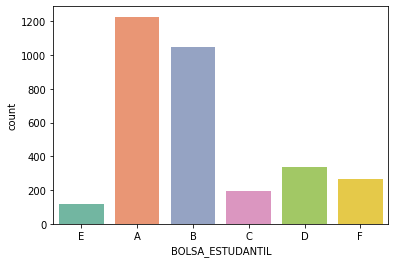

In [ ]:
sns.countplot(x='BOLSA_ESTUDANTIL', data=data, palette='Set2')
plt.show()

In [ ]:
dict_bolsa_estudantil = {'A':'SEM_BOLSA',
                     'B':'BOLSA',
                     'C':'BOLSA',
                     'D':'BOLSA',
                     'E':'BOLSA',
                     'F':'BOLSA'
                     }

In [ ]:
data['BOLSA_ESTUDANTIL'] = data.BOLSA_ESTUDANTIL.map(dict_bolsa_estudantil)
#create categorical 
data=pd.get_dummies(data, columns=["BOLSA_ESTUDANTIL"])
data.drop('BOLSA_ESTUDANTIL_BOLSA', axis=1, inplace=True)

In [ ]:
data.head(3)

,ANO_PROVA,ANO_ENTRADA,IDADE,ESCOLARIDADE_PAI,ESCOLARIDADE_MAE,RENDA_FAMILIAR,PRINCIPAL_MOTIVACAO,DURACAO_PERMANENCIA,PERMANENCIA_PROLONGADA,SEXO_M,ESTADO_CIVIL_SOlTEIRO,RACA_AMARELO,RACA_BRANCO,RACA_INDIGENA,RACA_NEGRO,RACA_N_D,RACA_PARDO,AUXILIO_ESTUDANTIL_SEM_AUXILIO,INTERCAMBIO_SEM_INTERCAMBIO,TRABALHO_DURANTE_GRAD_ACIMA_39_HORAS,TRABALHO_DURANTE_GRAD_ATE_20_HORAS,TRABALHO_DURANTE_GRAD_ENTRE_21_39_HORAS,TRABALHO_DURANTE_GRAD_ZERO_HORAS,COTAS_NAO_COTISTA,ENSINO_MEDIO_PUBLICO,BOLSA_ESTUDANTIL_SEM_BOLSA
0,2014,2009.0,18.0,5,4,4,E,5.0,0,1,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0
1,2014,2009.0,19.0,3,4,3,H,5.0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0
2,2014,2009.0,18.0,4,4,5,A,5.0,0,1,1,0,1,0,0,0,0,1,1,0,1,0,0,1,0,1


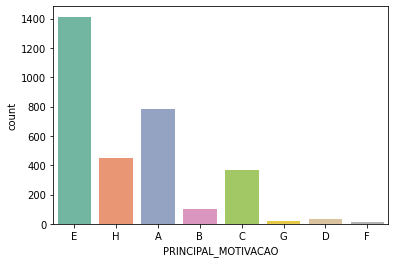

In [ ]:
sns.countplot(x='PRINCIPAL_MOTIVACAO', data=data, palette='Set2')
plt.show()

In [ ]:
dict_principal_motivacao = {'A':'OUTRO',
                     'B':'OUTRO',
                     'C':'OUTRO',
                     'D':'OUTRO',
                     'E':'VOCACAO',
                     'F':'OUTRO',
                     'G':'OUTRO',
                     'H':'OUTRO'       
                     }

In [ ]:
data['PRINCIPAL_MOTIVACAO'] = data.PRINCIPAL_MOTIVACAO.map(dict_principal_motivacao)
#create categorical 
data=pd.get_dummies(data, columns=["PRINCIPAL_MOTIVACAO"])
data.drop('PRINCIPAL_MOTIVACAO_OUTRO', axis=1, inplace=True)

In [ ]:
data.head(3)

,ANO_PROVA,ANO_ENTRADA,IDADE,ESCOLARIDADE_PAI,ESCOLARIDADE_MAE,RENDA_FAMILIAR,DURACAO_PERMANENCIA,PERMANENCIA_PROLONGADA,SEXO_M,ESTADO_CIVIL_SOlTEIRO,RACA_AMARELO,RACA_BRANCO,RACA_INDIGENA,RACA_NEGRO,RACA_N_D,RACA_PARDO,AUXILIO_ESTUDANTIL_SEM_AUXILIO,INTERCAMBIO_SEM_INTERCAMBIO,TRABALHO_DURANTE_GRAD_ACIMA_39_HORAS,TRABALHO_DURANTE_GRAD_ATE_20_HORAS,TRABALHO_DURANTE_GRAD_ENTRE_21_39_HORAS,TRABALHO_DURANTE_GRAD_ZERO_HORAS,COTAS_NAO_COTISTA,ENSINO_MEDIO_PUBLICO,BOLSA_ESTUDANTIL_SEM_BOLSA,PRINCIPAL_MOTIVACAO_VOCACAO
0,2014,2009.0,18.0,5,4,4,5.0,0,1,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1
1,2014,2009.0,19.0,3,4,3,5.0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0
2,2014,2009.0,18.0,4,4,5,5.0,0,1,1,0,1,0,0,0,0,1,1,0,1,0,0,1,0,1,0


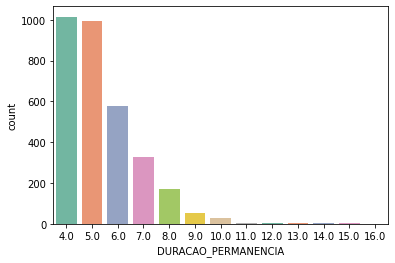

In [ ]:
sns.countplot(x='DURACAO_PERMANENCIA', data=data, palette='Set2')
plt.show()

In [ ]:
select_col = [c for c in data.columns.to_list() if c not in ['ANO_PROVA','ANO_ENTRADA','DURACAO_PERMANENCIA']]

In [ ]:
final_data = data[select_col].copy()

In [ ]:
final_data.head()

,IDADE,ESCOLARIDADE_PAI,ESCOLARIDADE_MAE,RENDA_FAMILIAR,PERMANENCIA_PROLONGADA,SEXO_M,ESTADO_CIVIL_SOlTEIRO,RACA_AMARELO,RACA_BRANCO,RACA_INDIGENA,RACA_NEGRO,RACA_N_D,RACA_PARDO,AUXILIO_ESTUDANTIL_SEM_AUXILIO,INTERCAMBIO_SEM_INTERCAMBIO,TRABALHO_DURANTE_GRAD_ACIMA_39_HORAS,TRABALHO_DURANTE_GRAD_ATE_20_HORAS,TRABALHO_DURANTE_GRAD_ENTRE_21_39_HORAS,TRABALHO_DURANTE_GRAD_ZERO_HORAS,COTAS_NAO_COTISTA,ENSINO_MEDIO_PUBLICO,BOLSA_ESTUDANTIL_SEM_BOLSA,PRINCIPAL_MOTIVACAO_VOCACAO
0,18.0,5,4,4,0,1,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1
1,19.0,3,4,3,0,1,1,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0
2,18.0,4,4,5,0,1,1,0,1,0,0,0,0,1,1,0,1,0,0,1,0,1,0
3,18.0,5,3,3,0,1,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1
4,18.0,4,4,6,0,1,1,0,1,0,0,0,0,1,1,0,0,1,0,1,0,1,0


In [ ]:
rename_dict = {
    'PERMANENCIA_PROLONGADA': 'target'
    }
final_data.rename(columns=rename_dict, inplace=True)
final_data = adjust_colum(final_data,['target'],final_data.shape[1]-1)

In [ ]:
final_data.head()

,IDADE,ESCOLARIDADE_PAI,ESCOLARIDADE_MAE,RENDA_FAMILIAR,SEXO_M,ESTADO_CIVIL_SOlTEIRO,RACA_AMARELO,RACA_BRANCO,RACA_INDIGENA,RACA_NEGRO,RACA_N_D,RACA_PARDO,AUXILIO_ESTUDANTIL_SEM_AUXILIO,INTERCAMBIO_SEM_INTERCAMBIO,TRABALHO_DURANTE_GRAD_ACIMA_39_HORAS,TRABALHO_DURANTE_GRAD_ATE_20_HORAS,TRABALHO_DURANTE_GRAD_ENTRE_21_39_HORAS,TRABALHO_DURANTE_GRAD_ZERO_HORAS,COTAS_NAO_COTISTA,ENSINO_MEDIO_PUBLICO,BOLSA_ESTUDANTIL_SEM_BOLSA,PRINCIPAL_MOTIVACAO_VOCACAO,target
0,18.0,5,4,4,1,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0
1,19.0,3,4,3,1,1,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0
2,18.0,4,4,5,1,1,0,1,0,0,0,0,1,1,0,1,0,0,1,0,1,0,0
3,18.0,5,3,3,1,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0
4,18.0,4,4,6,1,1,0,1,0,0,0,0,1,1,0,0,1,0,1,0,1,0,0


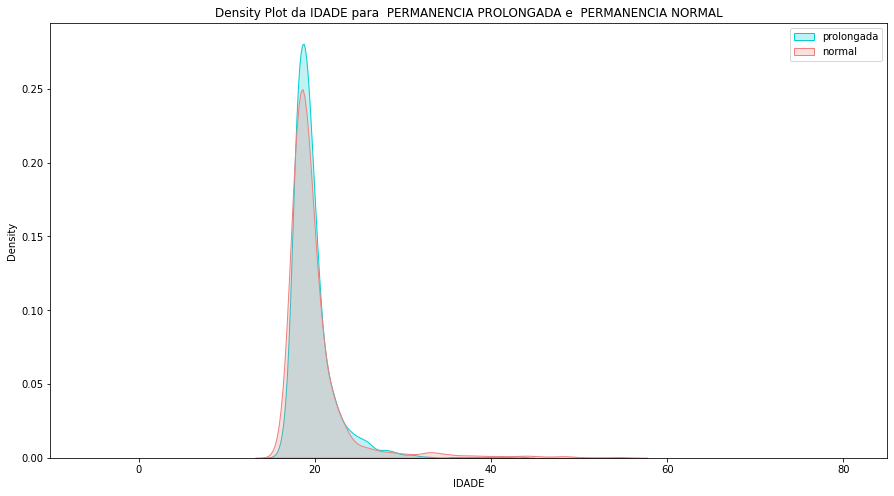

In [ ]:

plt.figure(figsize=(15,8))
ax = sns.kdeplot(final_data["IDADE"][final_data.target == 1], color="darkturquoise", shade=True)
sns.kdeplot(final_data["IDADE"][final_data.target == 0], color="lightcoral", shade=True)
plt.legend(['prolongada', 'normal'])
plt.title('Density Plot da IDADE para  PERMANENCIA PROLONGADA e  PERMANENCIA NORMAL')
ax.set(xlabel='IDADE')
plt.xlim(-10,85)
plt.show()



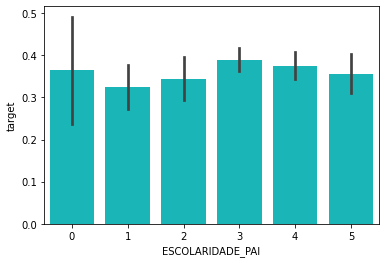

In [ ]:
sns.barplot('ESCOLARIDADE_PAI', 'target', data=final_data, color="darkturquoise")
plt.show()

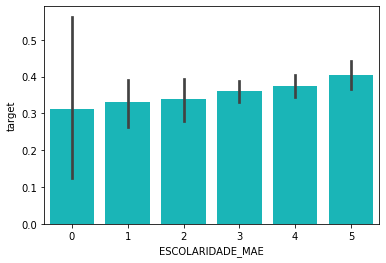

In [ ]:
sns.barplot('ESCOLARIDADE_MAE', 'target', data=final_data, color="darkturquoise")
plt.show()

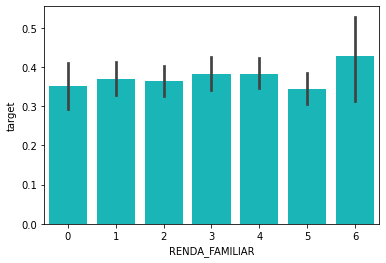

In [ ]:
sns.barplot('RENDA_FAMILIAR', 'target', data=final_data, color="darkturquoise")
plt.show()

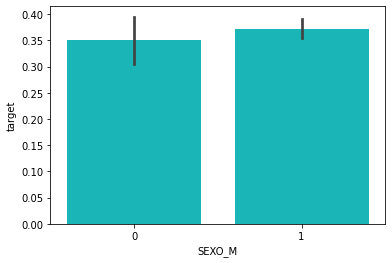

In [ ]:
sns.barplot('SEXO_M', 'target', data=final_data, color="darkturquoise")
plt.show()

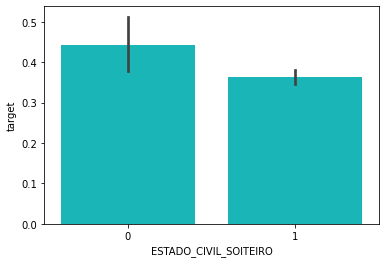

In [ ]:
sns.barplot('ESTADO_CIVIL_SOlTEIRO', 'target', data=final_data, color="darkturquoise")
plt.show()

In [ ]:
final_data.head(2).T

,0,1
IDADE,18.0,19.0
ESCOLARIDADE_PAI,5.0,3.0
ESCOLARIDADE_MAE,4.0,4.0
RENDA_FAMILIAR,4.0,3.0
SEXO_M,1.0,1.0
ESTADO_CIVIL_SOlTEIRO,1.0,1.0
RACA_AMARELO,0.0,1.0
RACA_BRANCO,1.0,0.0
RACA_INDIGENA,0.0,0.0
RACA_NEGRO,0.0,0.0


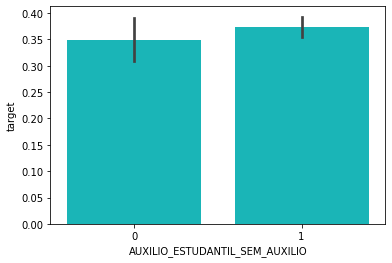

In [ ]:
sns.barplot('AUXILIO_ESTUDANTIL_SEM_AUXILIO', 'target', data=final_data, color="darkturquoise")
plt.show()

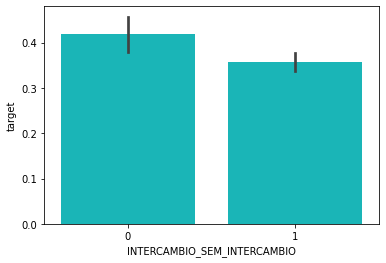

In [ ]:
sns.barplot('INTERCAMBIO_SEM_INTERCAMBIO', 'target', data=final_data, color="darkturquoise")
plt.show()

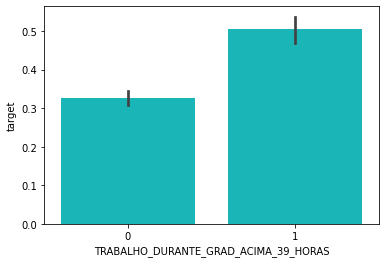

In [ ]:
sns.barplot('TRABALHO_DURANTE_GRAD_ACIMA_39_HORAS', 'target', data=final_data, color="darkturquoise")
plt.show()

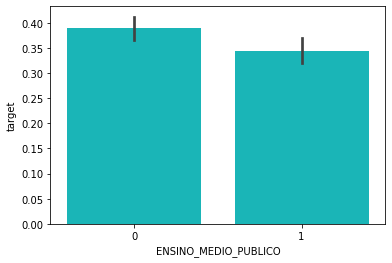

In [ ]:
sns.barplot('ENSINO_MEDIO_PUBLICO', 'target', data=final_data, color="darkturquoise")
plt.show()

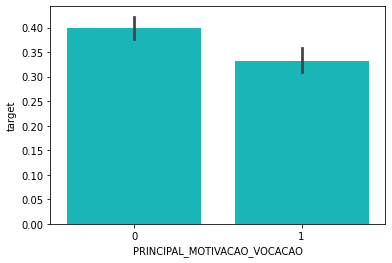

In [ ]:
sns.barplot('PRINCIPAL_MOTIVACAO_VOCACAO', 'target', data=final_data, color="darkturquoise")
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [ ]:
cols = ['IDADE','ESCOLARIDADE_PAI','ESCOLARIDADE_MAE','RENDA_FAMILIAR','SEXO_M','ESTADO_CIVIL_SOlTEIRO',
       'RACA_AMARELO','RACA_BRANCO','RACA_INDIGENA','RACA_NEGRO','RACA_N_D','RACA_PARDO',
        'AUXILIO_ESTUDANTIL_SEM_AUXILIO', 'INTERCAMBIO_SEM_INTERCAMBIO', 'TRABALHO_DURANTE_GRAD_ACIMA_39_HORAS',
        'TRABALHO_DURANTE_GRAD_ATE_20_HORAS','TRABALHO_DURANTE_GRAD_ENTRE_21_39_HORAS',
        'TRABALHO_DURANTE_GRAD_ZERO_HORAS', 'COTAS_NAO_COTISTA','ENSINO_MEDIO_PUBLICO','BOLSA_ESTUDANTIL_SEM_BOLSA',
        'PRINCIPAL_MOTIVACAO_VOCACAO']

In [ ]:
X = final_data[cols]
y = final_data['target']
# Build a logreg and compute the feature importances
model = LogisticRegression()
# create the RFE model and select 8 attributes
rfe = RFE(model, 21)
rfe = rfe.fit(X, y)
# summarize the selection of the attributes
print('Selected features: %s' % list(X.columns[rfe.support_]))

Selected features: ['IDADE', 'ESCOLARIDADE_PAI', 'ESCOLARIDADE_MAE', 'RENDA_FAMILIAR', 'SEXO_M', 'ESTADO_CIVIL_SOlTEIRO', 'RACA_AMARELO', 'RACA_BRANCO', 'RACA_INDIGENA', 'RACA_NEGRO', 'RACA_N_D', 'RACA_PARDO', 'AUXILIO_ESTUDANTIL_SEM_AUXILIO', 'INTERCAMBIO_SEM_INTERCAMBIO', 'TRABALHO_DURANTE_GRAD_ACIMA_39_HORAS', 'TRABALHO_DURANTE_GRAD_ATE_20_HORAS', 'TRABALHO_DURANTE_GRAD_ZERO_HORAS', 'COTAS_NAO_COTISTA', 'ENSINO_MEDIO_PUBLICO', 'BOLSA_ESTUDANTIL_SEM_BOLSA', 'PRINCIPAL_MOTIVACAO_VOCACAO']


Optimal number of features: 10
Selected features: ['RACA_AMARELO', 'RACA_INDIGENA', 'RACA_NEGRO', 'RACA_N_D', 'INTERCAMBIO_SEM_INTERCAMBIO', 'TRABALHO_DURANTE_GRAD_ACIMA_39_HORAS', 'TRABALHO_DURANTE_GRAD_ATE_20_HORAS', 'ENSINO_MEDIO_PUBLICO', 'BOLSA_ESTUDANTIL_SEM_BOLSA', 'PRINCIPAL_MOTIVACAO_VOCACAO']


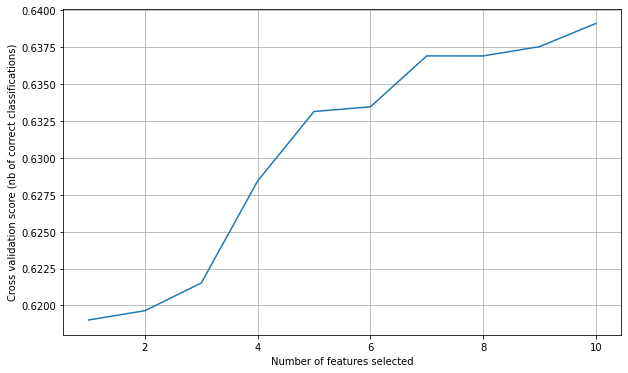

In [ ]:
from sklearn.feature_selection import RFECV
# Create the RFE object and compute a cross-validated score.
# The "accuracy" scoring is proportional to the number of correct classifications
rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=5, scoring='accuracy')
rfecv.fit(X, y)

print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % list(X.columns[rfecv.support_]))

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.grid()
plt.show()

In [ ]:
X = final_data[cols]
y = final_data['target']
# Build a logreg and compute the feature importances
model = LogisticRegression()
# create the RFE model and select 10 attributes
rfe = RFE(model, 10)
rfe = rfe.fit(X, y)
# summarize the selection of the attributes
print('Selected features: %s' % list(X.columns[rfe.support_]))

Selected features: ['RACA_AMARELO', 'RACA_INDIGENA', 'RACA_NEGRO', 'RACA_N_D', 'INTERCAMBIO_SEM_INTERCAMBIO', 'TRABALHO_DURANTE_GRAD_ACIMA_39_HORAS', 'TRABALHO_DURANTE_GRAD_ATE_20_HORAS', 'ENSINO_MEDIO_PUBLICO', 'BOLSA_ESTUDANTIL_SEM_BOLSA', 'PRINCIPAL_MOTIVACAO_VOCACAO']


In [ ]:
Selected_features = list(X.columns[rfe.support_])


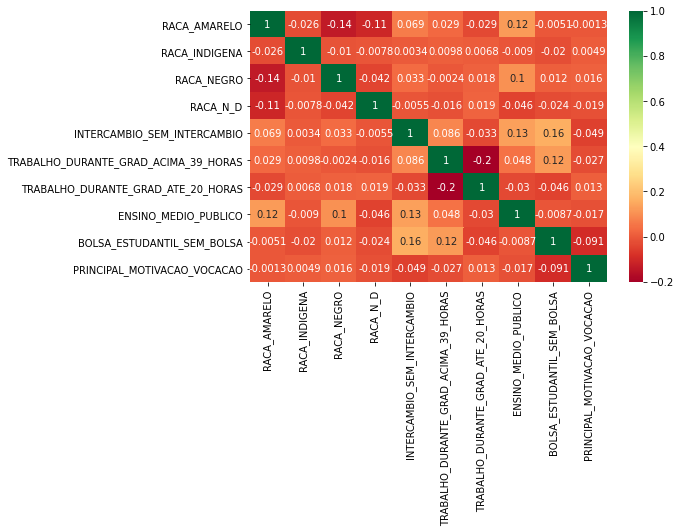

In [ ]:

X = final_data[Selected_features]

plt.subplots(figsize=(8, 5))
sns.heatmap(X.corr(), annot=True, cmap="RdYlGn")
plt.show()

Train/Test split results:
LogisticRegression accuracy is 0.656
LogisticRegression log_loss is 0.619
LogisticRegression auc is 0.650


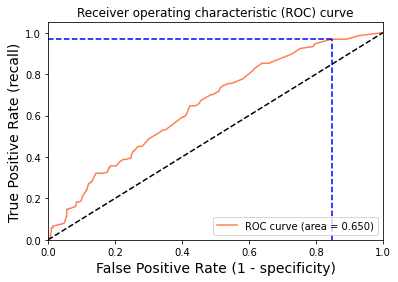

Using a threshold of 0.263 guarantees a sensitivity of 0.969 and a specificity of 0.153, i.e. a false positive rate of 84.75%.


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

# create X (features) and y (response)
X = final_data[Selected_features]
y = final_data['target']

# use train/test split with different random_state values
# we can change the random_state values that changes the accuracy scores
# the scores change a lot, this is why testing scores is a high-variance estimate
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# check classification scores of logistic regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg. q(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Train/Test split results:')
print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(logreg.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))

######################################################################################################

### Curva KS

In [ ]:
df_ks = pd.DataFrame()

In [ ]:
df_ks['y'] = y_test
df_ks['p'] = y_pred_proba

In [ ]:
df_ks_result = ks(data=df_ks,target="y", prob="p")

KS is 0.219% at decile 6


In [ ]:
df_ks_result

,min_prob,max_prob,events,nonevents,event_rate,nonevent_rate,cum_eventrate,cum_noneventrate,KS
Decile,,,,,,,,,
1,0.531528,0.726513,33,24,14.73%,5.81%,0.147321,0.058111,0.089
2,0.471804,0.529739,30,30,13.39%,7.26%,0.281250,0.130751,0.150
3,0.413599,0.471680,25,48,11.16%,11.62%,0.392857,0.246973,0.146
4,0.387744,0.412608,21,22,9.38%,5.33%,0.486607,0.300242,0.186
5,0.365005,0.386608,32,49,14.29%,11.86%,0.629464,0.418886,0.211
6,0.329363,0.362025,23,39,10.27%,9.44%,0.732143,0.513317,0.219
7,0.308514,0.327779,21,42,9.38%,10.17%,0.825893,0.615012,0.211
8,0.296126,0.304355,16,47,7.14%,11.38%,0.897321,0.728814,0.169
9,0.263015,0.286024,16,49,7.14%,11.86%,0.968750,0.847458,0.121


### Plot Curva KS

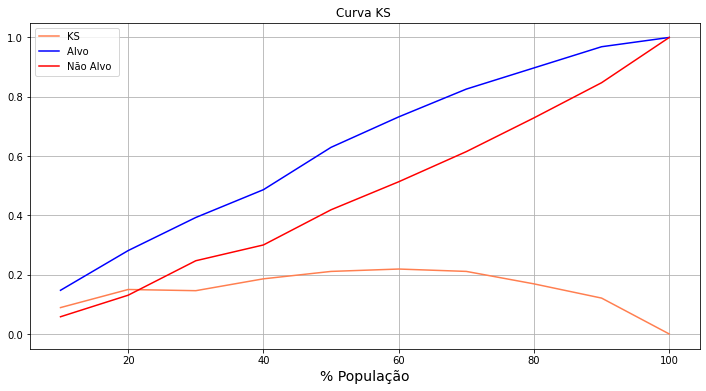

In [ ]:
plt.figure(figsize=(12,6))
xs = [10,20,30,40,50,60,70,80,90,100]
plt.plot(xs,df_ks_result.KS.values, color='coral', label='KS ')
plt.plot(xs,df_ks_result.cum_eventrate.values, color='blue', label='Alvo ')
plt.plot(xs,df_ks_result.cum_noneventrate.values, color='red', label='Não Alvo ')
plt.title('Curva KS ')
plt.xlabel('% População', fontsize=14)
plt.legend(loc="best")
plt.grid()
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.05])
plt.show()